In [1]:
import pandas as pd
from os.path import exists

In [2]:
df = pd.read_csv("DATASET/B/train.csv")

In [3]:
for i, row in df.iterrows():
    if exists("DATASET/B/B/data/"+row["image_path"]) == False:
        df = df.drop(i)
    

In [4]:
df.reset_index
df.pop("Unnamed: 0")

0        8140
1       11389
3        7981
8         173
10       7942
        ...  
9447     4008
9448     6401
9449    12515
9450    11683
9456     9697
Name: Unnamed: 0, Length: 5282, dtype: int64

In [5]:
df

,image_path,Taca oli,Carrera,Agujero,Hilo fino horizontal2,Tensión horizontal,Barrado,Borrissol,Hilo fino horizontal,Punto escapado
0,4aaf06a9-frame0-00-08.95.jpg,0,0,0,1,0,0,0,0,0
1,19c8888a-frame0-00-15.68.jpg,0,0,0,0,0,0,0,0,0
3,5e93a55a-frame0-00-12.03.jpg,0,0,0,1,0,0,0,0,0
8,47b8fa6d-frame0-00-20.79.jpg,0,0,0,0,0,0,0,0,0
10,6787b1aa-frame0-00-13.24.jpg,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9447,465d9bce-frame0-00-32.28.jpg,0,0,0,0,0,0,0,0,0
9448,2efd8409-frame0-00-11.38.jpg,0,0,0,0,0,0,0,1,0
9449,6bc3fdda-frame0-00-01.45.jpg,0,0,0,0,0,0,0,0,0
9450,6efef5e7-frame0-00-09.95.jpg,0,0,0,0,0,0,0,0,0


In [6]:
df.to_csv("verd_df_clean.csv")

---

In [7]:
import tensorflow as tf
import cv2
from tensorflow import keras
import numpy as np

In [8]:
def create_dataset():
    for i, row in df.iterrows():
        img = cv2.cvtColor(cv2.imread("DATASET/B/B/data/"+row["image_path"]), cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (224,224)) 
        yield (img,list(row)[1:])

In [97]:
imgs = []
labels = []
for i, row in df.iterrows():
    img = cv2.cvtColor(cv2.imread("DATASET/B/B/data/"+row["image_path"]), cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (224,224))
    img = img/img.max()
    labels.append(np.array(row)[1:])
    imgs.append(img)
    if(i > 500):
        break

imgs = np.array(imgs)
labels = np.array(labels)

In [98]:
labels.shape

(282, 9)

In [99]:
imgs.shape

(282, 224, 224)

In [100]:
tf_df = tf.data.Dataset.from_generator(create_dataset,output_types = (tf.int64,tf.int64), output_shapes=(len(df),(224,224,1)))

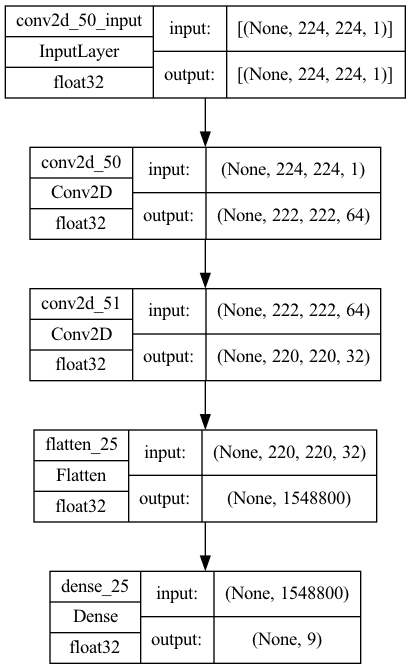

In [101]:
model = keras.Sequential([
    keras.layers.Conv2D(64, 3, activation='relu', input_shape=(224, 224,1)),
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(9, activation='softmax')
])
 
# Compiling the model
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Fitting the model with data
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
)

In [102]:
model.fit(imgs,labels, epochs=5,
          batch_size=1)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('DATASET/B/B/data')

Found 0 files belonging to 0 classes.


ValueError: No images found in directory DATASET/B/B/data. Allowed formats: ('.bmp', '.gif', '.jpeg', '.jpg', '.png')